* import all the required libraries
* load the tips dataset from the seaborn library
* store it in df variable and so the basic analysis like shape, info, describe, etc.
* check if there are any null values
* do the necessary treatment like fillna, dropna
* find the outliers and store the df with outliers in a separate variable(iqr method)
* visualization part: (matplotlib and seaborn)
* do univariate analysis
* do bivariate analysis
* do multivariate analysis
* give business insights

## import all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## load the tips dataset from the seaborn library

In [2]:
df=sns.load_dataset("tips")

## store it in df variable and so the basic analysis like shape, info, describe, etc.

In [3]:
df.shape

(244, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.describe(exclude=object)

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## check if there are any null values

## do the necessary treatment like fillna, dropna

In [13]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Since there are no null values, there is no necessity for treatment

In [44]:
num=df.select_dtypes(include="number").columns
cat=df.select_dtypes(exclude="number").columns
print(cat)
print(num)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Index(['total_bill', 'tip', 'size'], dtype='object')


## find the outliers and store the df with outliers in a separate variable(iqr method)

In [46]:
# iqr
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
iqr

lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(upper)
print(lower)

total_bill    13.3475
tip            2.0000
size           2.0000
Name: 0.25, dtype: float64
total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64
total_bill    40.29750
tip            5.90625
size           4.50000
dtype: float64
total_bill   -2.82250
tip          -0.34375
size          0.50000
dtype: float64


In [60]:
outliers=df[((df[num]>upper)|(df[num]<lower)).any(axis=1)]
no_outliers=df[~((df[num]>upper)|(df[num]<lower)).any(axis=1)]

In [50]:
#df[['total_bill', 'tip', 'size']]
#df[num]

,total_bill,tip,size
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
239,False,True,False
240,False,False,False
241,False,False,False
242,False,False,False


In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## visualization part: (matplotlib and seaborn)s

## do univariate analysis

C:\Users\dell\AppData\Local\Temp\ipykernel_4292\184465556.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tip"])


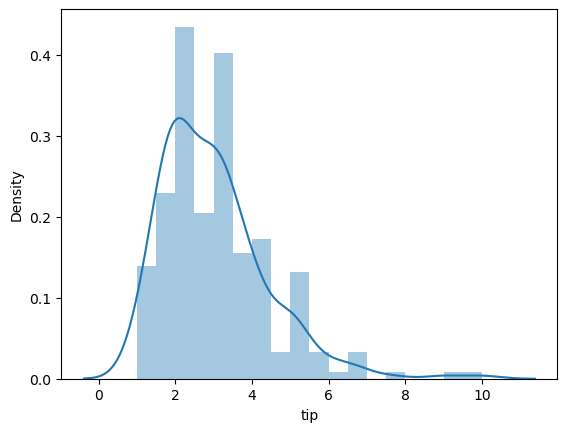

In [39]:
sns.distplot(df["tip"])
plt.show()

In [41]:
df['tip'].skew()

1.4654510370979401

### tips is showing positive skewness

C:\Users\dell\AppData\Local\Temp\ipykernel_4292\682483672.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["total_bill"])


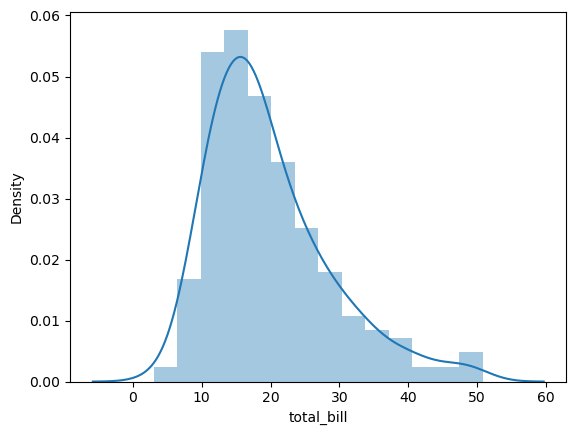

In [44]:
sns.distplot(df["total_bill"])
plt.show()

In [46]:
df['total_bill'].skew()

1.1332130376158205

### total bill coluumn is right skewed

C:\Users\dell\AppData\Local\Temp\ipykernel_4292\733860959.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['size'])


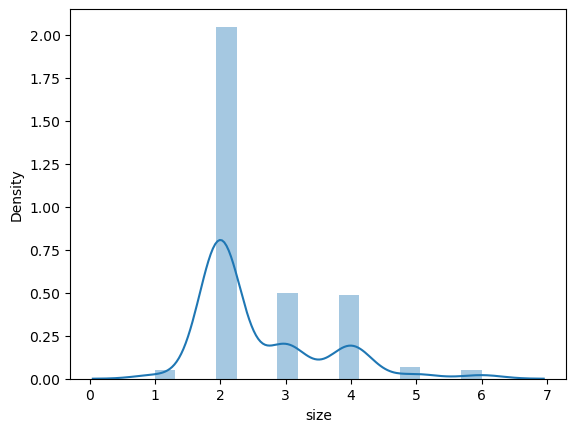

In [49]:
sns.distplot(df['size'])
plt.show()

In [51]:
df['size'].skew()

1.4478815386834785

### in majority, two people occupy the table

In [54]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


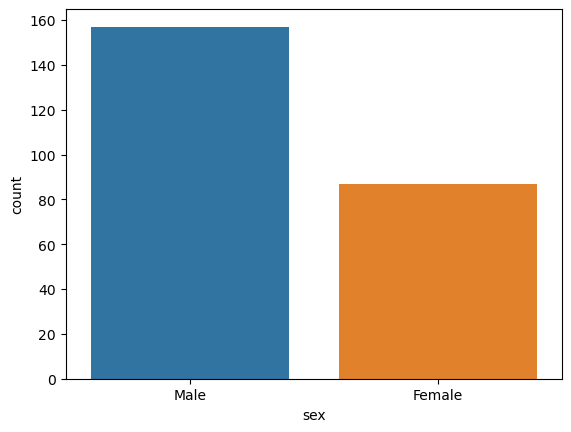

In [58]:
sns.countplot(x = df['sex'], hue = df.sex) #palette = ["yellow","red"]
plt.show()

<Axes: xlabel='smoker', ylabel='count'>

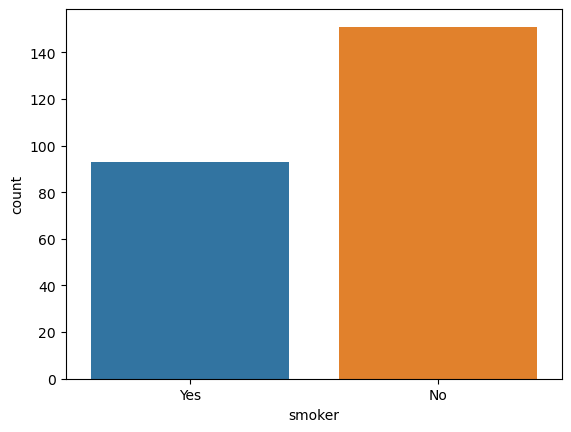

In [64]:
sns.countplot(x=df['smoker'],hue=df.smoker)

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

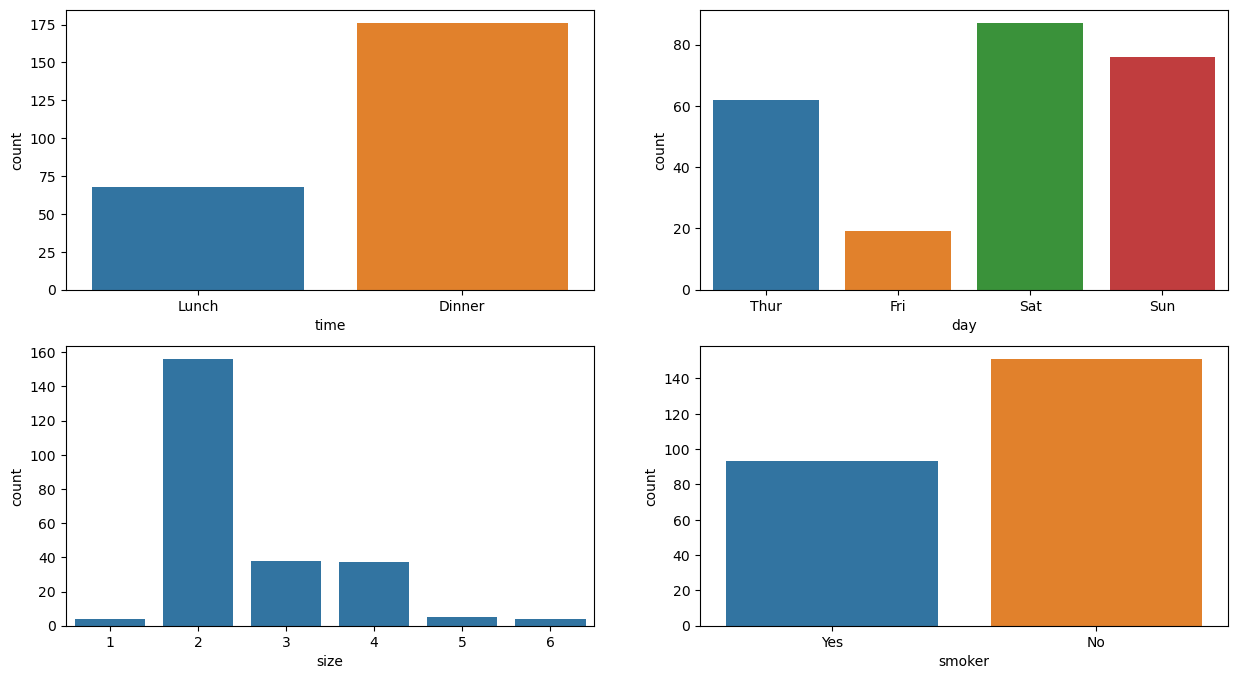

In [110]:
f, ax = plt.subplots(2,2, figsize=(15,8))
sns.countplot(x = df['time'], hue = df.time, ax = ax[0,0])
sns.countplot(x = df['day'], hue = df.day, ax = ax[0,1])
sns.countplot(x = df['size'], ax = ax[1,0])
sns.countplot(x = df['smoker'],hue=df.smoker,  ax = ax[1,1])
plt.show()

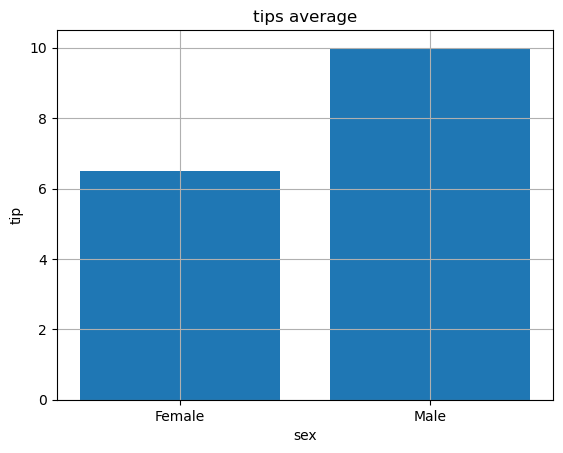

In [90]:
plt.bar(df["sex"],df["tip"])
plt.grid()
plt.xlabel("sex")
plt.ylabel("tip")
plt.title("tips average")
plt.show()